In [1]:
import pandas as pd
import seaborn as ans
import numpy as np

In [10]:
ds = pd.read_csv('dst-3.0_16_1_hh_database.csv', sep=';')
ds.head(5)

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


In [11]:
#Чему равна размерность таблицы?
ds.shape

(44744, 12)

In [12]:
#Какой тип данных имеют все столбцы?
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

In [13]:
#Сколько уникальных значений содержится в столбце «Опыт работы»?
ds['Опыт работы'].unique().size

44414

In [14]:
#Какая из искомых должностей самая распространённая?
ds['Ищет работу на должность:'].value_counts()

,count
Ищет работу на должность:,
Системный администратор,3099
Инженер,966
Аналитик,809
Менеджер проектов,745
Руководитель проекта,718
...,...
"Системный администратор Linux, DevOps, Разработчик Golang",1
"Инженер КИПиА,инженер АСУТП ,видеоинженер",1
SEO-специалист | Специалист по интернет-рекламе | Интернет-маркетолог,1


In [15]:
# создадим функцию для расчета уровня образования
def get_education(arg):
    arg = ' '.join(arg.split(' ')[:3])
    if 'Высшее' in arg:
        return 'высшее'
    elif 'Неоконченное высшее' in arg:
        return 'неоконченное высшее'
    elif 'Среднее специальное' in arg:
        return 'среднее специальное'
    elif 'Среднее образование' in arg:
        return 'среднее'
ds['Образование'] = ds['Образование и ВУЗ'].apply(get_education)
data = ds.drop('Образование и ВУЗ', axis=1)

#Сколько соискателей имеет средний уровень образования (школьное образование)?
print(data['Образование'].value_counts()['среднее'])

559


In [16]:
#функция для определения пола
def get_sex(arg):
    if 'Мужчина' in arg:
        return 'М'
    else:
        return 'Ж'

#функция для опеределения возраста
def get_age(arg):
    arg_splitted = arg.split(' ')
    year_words=['год', 'года', 'лет']
    for index, item in enumerate (arg_splitted):
        if item in year_words:
            return int(arg_splitted[index-1])

data['Пол'] = data['Пол, возраст'].apply(get_sex)
data['Возраст'] = data['Пол, возраст'].apply(get_age)
data = data.drop('Пол, возраст', axis=1)

#Сколько процентов женских резюме представлено в наших данных? Ответ округлите до сотых.
print(round(data['Пол'].value_counts(normalize=True)['Ж'] * 100, 2))

#Чему равен средний возраст соискателей? Ответ округлите до десятых.
print(round(data['Возраст'].mean(), 2))

19.07
32.2


In [18]:
#функция расчета опыта работы
def get_experience(arg):
    if arg is np.nan or arg == 'Не указано':
        return None
    year_words=['год', 'года', 'лет']
    month_words=['месяц', 'месяца', 'месяцев']
    arg_splitted = arg.split(' ')[:7]
    years = 0
    months = 0
    for index, item in enumerate (arg_splitted):
        if item in year_words:
            years = int(arg_splitted[index-1])
        if item in month_words:
            months = int(arg_splitted[index-1])
    return int(years*12 + months)
data['Опыт работы (месяц)'] = data['Опыт работы'].apply(get_experience)

#Чему равен медианный опыт работы (в месяцах) в нашей таблице?
print(round(data['Опыт работы (месяц)'].median()))

100


In [20]:
#функция расчета города проживания

def get_city(arg):
    million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород',
                      'Казань', 'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону',
                      'Уфа', 'Красноярск', 'Пермь', 'Воронеж', 'Волгоград'
                     ]
    city = arg.split(' , ')[0]
    if (city == 'Москва') or (city == 'Санкт-Петербург'):
        return city
    elif city in million_cities:
        return 'город миллионник'
    else:
        return 'другие'

#функция расчета готовности к переезду

def get_ready_to_move(arg):
    if ('не готов к переезду' in arg) or ('не готова к переезду' in arg):
        return False
    elif 'хочу' in arg:
        return True
    else:
        return True

#функция расчета готовности к командировкам
def get_ready_for_bisiness_trips(arg):
    if ('командировка' in arg):
        if ('не готов к командировкам' in arg) or('не готова к командировкам' in arg):
            return False
        else:

            return True
    else:
        return False

data['Город'] = data['Город, переезд, командировки'].apply(get_city)
data['Готовность к переезду'] = data['Город, переезд, командировки'].apply(get_ready_to_move)
data['Готовность к командировкам'] = data['Город, переезд, командировки'].apply(get_ready_for_bisiness_trips)
data = data.drop('Город, переезд, командировки', axis=1)

#Сколько процентов соискателей живут в Санкт-Петербурге? Ответ округлите до целого.
print(round(data['Город'].value_counts(normalize=True)['Санкт-Петербург'] * 100))

#Сколько процентов соискателей готовы одновременно и к переездам, и к командировкам? Ответ округлите до целого.
print(round(data[data['Готовность к переезду'] & data['Готовность к командировкам']].shape[0] / data.shape[0] *100))

11
32


In [19]:
employments = ['полная занятость', 'частичная занятость',
              'проектная работа', 'волонтерство', 'стажировка']
charts = ['полный день', 'сменный график',
         'гибкий график', 'удаленная работа',
         'вахтовый метод']
for employment, chart in zip(employments, charts):
    data[employment] = data['Занятость'].apply(lambda x: employment in x)
    data[chart] = data['График'].apply(lambda x: chart in x)
data = data.drop('Занятость', axis=1)
data = data.drop('График', axis=1)

#Сколько людей ищут проектную работу и волонтёрство (в обоих столбцах стоит True)?
print(data[data['проектная работа'] & data['волонтерство']].shape[0])

#Сколько людей хотят работать вахтовым методом и с гибким графиком (в обоих столбцах стоит True)?
print(data[data['вахтовый метод'] & data['гибкий график']].shape[0])

436
2311


In [27]:
def get_salary_num(arg):
    salary = float(arg.split(' ')[0])
    return salary

def get_salary_currency(arg):
    currency_dict = {
        'USD': 'USD', 'KZT': 'KZT',
        'грн': 'UAH', 'белруб': 'BYN',
        'EUR': 'EUR', 'KGS': 'KGS',
        'сум': 'UZS', 'AZN': 'AZN'
    }
    curr = arg.split(' ')[1].replace('.', '')
    if curr == 'руб':
        return 'RUB'
    else:
        return currency_dict[curr]

rates = pd.read_csv('ExchangeRates.csv')
rates['date'] = pd.to_datetime(rates['date'], dayfirst=True).dt.date
data['Обновление резюме'] = pd.to_datetime(data['Обновление резюме'], dayfirst=True).dt.date
data['ЗП (tmp)'] = data['ЗП'].apply(get_salary_num)
data['Курс (tmp)'] = data['ЗП'].apply(get_salary_currency)
merged = data.merge(
    rates,
    left_on=['Курс (tmp)', 'Обновление резюме'],
    right_on=['currency', 'date',],
    how='left'
)
merged['close'] = merged['close'].fillna(1)
merged['proportion'] = merged['proportion'].fillna(1)
data['ЗП (руб)'] = merged['close'] * merged['ЗП (tmp)'] / merged['proportion']
data = data.drop(['ЗП', 'ЗП (tmp)', 'Курс (tmp)'], axis=1)

#Чему равна желаемая медианная заработная плата соискателей в нашей таблице (в рублях)?
print(round(data['ЗП (руб)'].median()/1000))

<ipython-input-27-f99f3fb3e133>:19: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



59


In [28]:
#Чему равно модальное значение возраста соискателей?
data['Возраст'].mode()[0]

30

In [30]:
#Чему равен максимальный опыт работы (в месяцах)?
data['Опыт работы (месяц)'].max()

1188.0

In [32]:
#Определите по графику, сколько соискателей требуют заработную плату выше 1 миллиона рублей.
data[data['ЗП (руб)']>1e6].shape

(5, 24)

In [34]:
#Какая категория образования оплачивается выше всех по медианному показателю?
data.groupby('Образование').agg({'ЗП (руб)': 'median'})

,ЗП (руб)
Образование,
высшее,60000.0
неоконченное высшее,50000.0
среднее,40000.0
среднее специальное,40000.0


In [35]:
bar_data = data[data['ЗП (руб)']<1e6].groupby('Образование', as_index=False).agg({'ЗП (руб)': 'median'})
fig = px.bar(
    data_frame=bar_data,
    x='Образование',
    y='ЗП (руб)',
    title='Медианная з/п по уровню образования'
)
fig.show()

In [36]:
#В каком городе (категории городов) зафиксирован наибольший показатель желаемой заработной платы (~924 тысячи рублей)?
data.groupby('Город').agg({'ЗП (руб)': 'max'})

,ЗП (руб)
Город,
Москва,3000000.0
Санкт-Петербург,645171.0
город миллионник,511681.6
другие,24304876.0


In [37]:
box_data = data[data['ЗП (руб)']<1e6]
fig = px.box(
    data_frame=box_data,
    x='Город',
    y='ЗП (руб)',
    color='Город',
    title='Распределение з/п по городам'
)
fig.show()

In [38]:
#Чему равна желаемая медианная заработная плата соискателей, готовых и к переезду, и к командировкам? Ответ приведите в тысячах, округлив до целого (например, 45).
round(data[(data['Готовность к переезду']==True)&(data['Готовность к командировкам']==True)]['ЗП (руб)'].median()/1000)

66

In [39]:
bar_data = data.groupby(
    ['Готовность к командировкам', 'Готовность к переезду'],
    as_index=False
)['ЗП (руб)'].median()
fig = px.bar(
    data_frame=bar_data,
    y='Готовность к переезду',
    x='ЗП (руб)',
    barmode="group",
    color='Готовность к командировкам',
    orientation='h',
    title='Медианная з/п по готовности к командировкам/переезду'
)
fig.show()

In [40]:
pivot = data.pivot_table(
    index='Образование',
    columns='Возраст',
    values='ЗП (руб)',
    aggfunc='median',
    fill_value=0
)
fig = px.imshow(
    pivot,
    aspect='auto',
    color_continuous_scale='greens',
    title='Медианная з/п по образованию и возрасту'
)
fig.show()

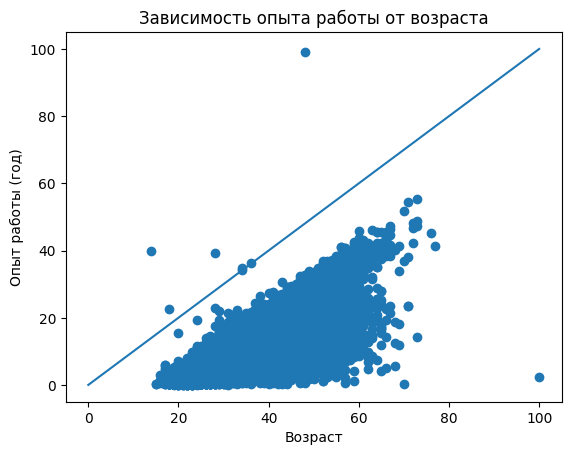

In [41]:
from matplotlib import pyplot as plt
data['Опыт работы (год)'] = data['Опыт работы (месяц)'] / 12
x = list(range(0, 101, 10))
y = list(range(0, 101, 10))
plt.scatter(data['Возраст'], data['Опыт работы (год)'])
plt.plot(x, y)
plt.xlabel('Возраст')
plt.ylabel('Опыт работы (год)')
plt.title('Зависимость опыта работы от возраста')
plt.show()

In [42]:
#Сколько полных копий удалось найти?
duplicates = data[data.duplicated(subset=data.columns)]
data = data.drop_duplicates()
print(duplicates.shape[0])

155


In [43]:
#Сколько пропусков в столбце «Опыт работы (месяц)»?
null_data = data.isnull().sum()
null_data[null_data > 0]

,0
Опыт работы,166
Последнее/нынешнее место работы,1
Последняя/нынешняя должность,2
Опыт работы (месяц),168
Опыт работы (год),168


In [44]:
#Чему равно результирующее среднее значение в столбце «Опыт работы (месяц)» после заполнения пропусков? Ответ округлите до целых.
data = data.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])
data['Опыт работы (месяц)'] = data['Опыт работы (месяц)'].fillna(data['Опыт работы (месяц)'].median())
round(data['Опыт работы (месяц)'].mean())

<ipython-input-44-bebf39ae3c57>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



114

In [45]:
#Сколько выбросов вы нашли?
outliers = data[(data['ЗП (руб)'] > 1e6) | (data['ЗП (руб)'] < 1e3)]
data = data.drop(outliers.index)
print(outliers.shape[0])

89


In [46]:
#Сколько выбросов вы нашли?
outliers = data[data['Опыт работы (месяц)']/12 >= data['Возраст']]
data = data.drop(outliers.index)
outliers.shape[0]

7